# Credit:  Eno Chen and Sherlin Whaley, Bethel School of Technology 2019

## Import Packages

In [0]:
import pandas as pd
pd.set_option('display.max_columns', 500)
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

%matplotlib inline

## Import Data

- Import data from our Github repository

In [0]:
url = 'https://raw.githubusercontent.com/eno-chen/breastcancerwisconsin/master/BCW.csv'
BCW = pd.read_csv(url)
BCW.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


## Data Wrangling

- Remove 'id' as it cannot be used for analysis.
- Remove 'Unnamed: 32' as it only contains NaN's

In [0]:
BCW1 = BCW.drop(['id', 'Unnamed: 32'], axis = 1)
BCW1.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


#### Size of our data:

In [0]:
BCW1.shape

(569, 31)

- There are 569 rows and 31 columns in the data set.

## Understadning the structure of the data set

In [0]:
BCW1.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


- The first column "diagnosis" is our _Outcome Variable_. This is the variable we are trying to predict.

- Following the diagnosis column are *ten real-valued features* computed for each cell nucleus. These are our _Predictor Variables_.

    1. radius (mean of distances from center to points on the perimeter) 
    2. texture (standard deviation of gray-scale values) 
    3. perimeter 
    4. area 
    5. smoothness (local variation in radius lengths) 
    6. compactness (perimeter^2 / area - 1.0) 
    7. concavity (severity of concave portions of the contour) 
    8. concave points (number of concave portions of the contour) 
    9. symmetry 
    10. fractal dimension ("coastline approximation" - 1)


- The mean, standard error, and "worst" or largest (mean of the three largest values) of these features were computed for each image, resulting in 30 features.
    - Column 0: __diagnosis__ (python lists are 0-indexed)
    - Columns 1-11: __mean__
    - Columns 12-21: __standard error__
    - Columns 22-31: __worst__

## Determining the _Predictor Variables_

- Do we use the mean values, standard errors, worst values or all?
- Let's think about _Standard Errors_. Since they are used for ANOVAs (comparision of means of different groups), we will not be using them for our predictive modeling.

- That leaves us with the mean values and worst values. Let's use the _correlation matrix_ to see if they are correlated.

## Correlation Matrix (mean & worst values)

- Create a subset of just the mean and worst values

In [0]:
meanWorst = BCW1.iloc[:,[1,2,3,4,5,6,7,8,9,10,21,22,23,24,25,26,27,28,29,30]]
meanWorst.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


- Generate Correlation Matrix

In [0]:
meanWorst.corr(method='pearson').style.format("{:.2}").background_gradient(cmap=plt.get_cmap('coolwarm'), axis=1)

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
radius_mean,1.0,0.32,1.0,0.99,0.17,0.51,0.68,0.82,0.15,-0.31,0.97,0.3,0.97,0.94,0.12,0.41,0.53,0.74,0.16,0.0071
texture_mean,0.32,1.0,0.33,0.32,-0.023,0.24,0.3,0.29,0.071,-0.076,0.35,0.91,0.36,0.34,0.078,0.28,0.3,0.3,0.11,0.12
perimeter_mean,1.0,0.33,1.0,0.99,0.21,0.56,0.72,0.85,0.18,-0.26,0.97,0.3,0.97,0.94,0.15,0.46,0.56,0.77,0.19,0.051
area_mean,0.99,0.32,0.99,1.0,0.18,0.5,0.69,0.82,0.15,-0.28,0.96,0.29,0.96,0.96,0.12,0.39,0.51,0.72,0.14,0.0037
smoothness_mean,0.17,-0.023,0.21,0.18,1.0,0.66,0.52,0.55,0.56,0.58,0.21,0.036,0.24,0.21,0.81,0.47,0.43,0.5,0.39,0.5
compactness_mean,0.51,0.24,0.56,0.5,0.66,1.0,0.88,0.83,0.6,0.57,0.54,0.25,0.59,0.51,0.57,0.87,0.82,0.82,0.51,0.69
concavity_mean,0.68,0.3,0.72,0.69,0.52,0.88,1.0,0.92,0.5,0.34,0.69,0.3,0.73,0.68,0.45,0.75,0.88,0.86,0.41,0.51
concave points_mean,0.82,0.29,0.85,0.82,0.55,0.83,0.92,1.0,0.46,0.17,0.83,0.29,0.86,0.81,0.45,0.67,0.75,0.91,0.38,0.37
symmetry_mean,0.15,0.071,0.18,0.15,0.56,0.6,0.5,0.46,1.0,0.48,0.19,0.091,0.22,0.18,0.43,0.47,0.43,0.43,0.7,0.44
fractal_dimension_mean,-0.31,-0.076,-0.26,-0.28,0.58,0.57,0.34,0.17,0.48,1.0,-0.25,-0.051,-0.21,-0.23,0.5,0.46,0.35,0.18,0.33,0.77


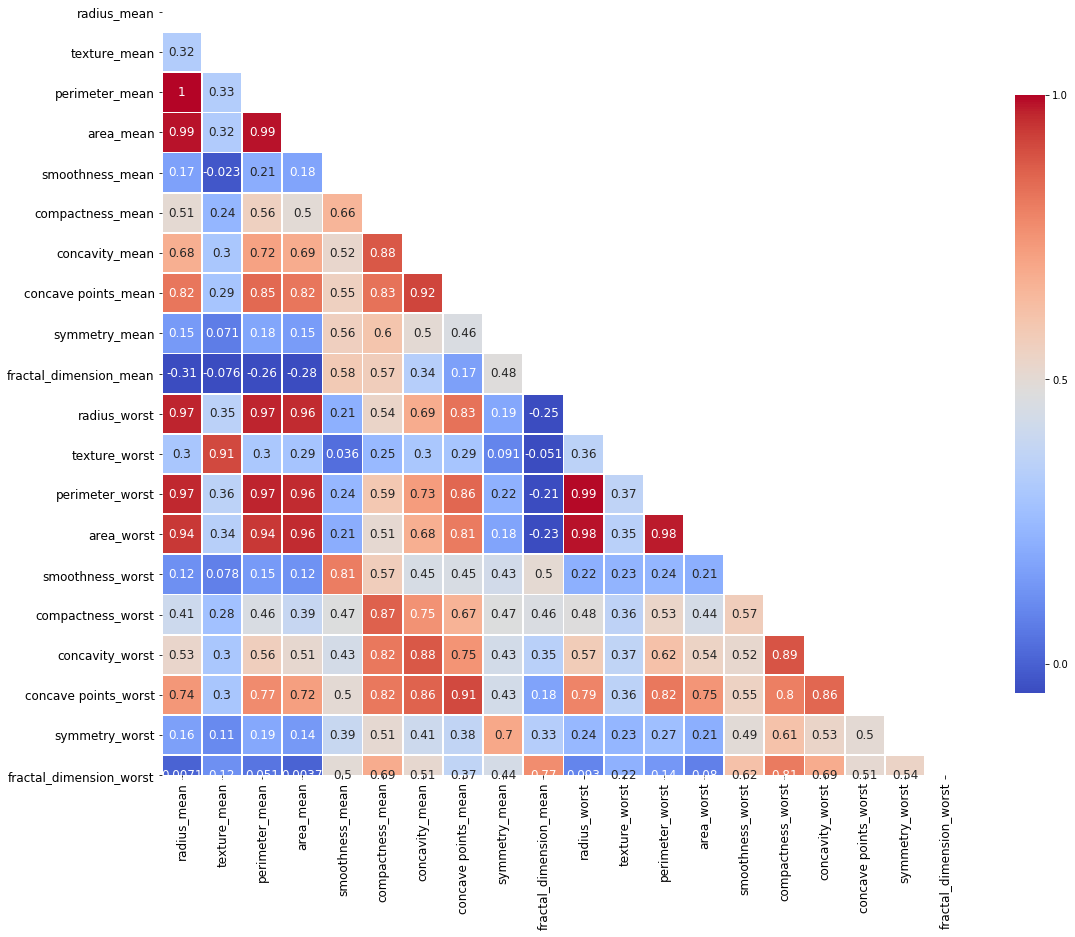

In [0]:
corr_matrix = meanWorst.corr()

mask = np.zeros_like(corr_matrix, dtype=np.bool)
mask[np.triu_indices_from(mask)]= True

f, ax = plt.subplots(figsize=(18, 22))

heatmap = sns.heatmap(corr_matrix,
                      mask = mask,
                      square = True,
                      linewidths = .75,
                      cmap = 'coolwarm',
                      cbar_kws = {'shrink': .5,
                                'ticks' : [-1, -.5, 0, 0.5, 1]},
                      vmin = -.05,
                      vmax = 1,
                      annot = True,
                      annot_kws = {'size': 12})

#add the column names as labels
ax.set_yticklabels(corr_matrix.columns, rotation = 0, fontsize = 12)
ax.set_xticklabels(corr_matrix.columns, fontsize = 12)

sns.set_style({'xtick.bottom': True}, {'ytick.left': True})

In [0]:
heatmap.get_figure().savefig('heatmap.png', bbox_inches='tight')

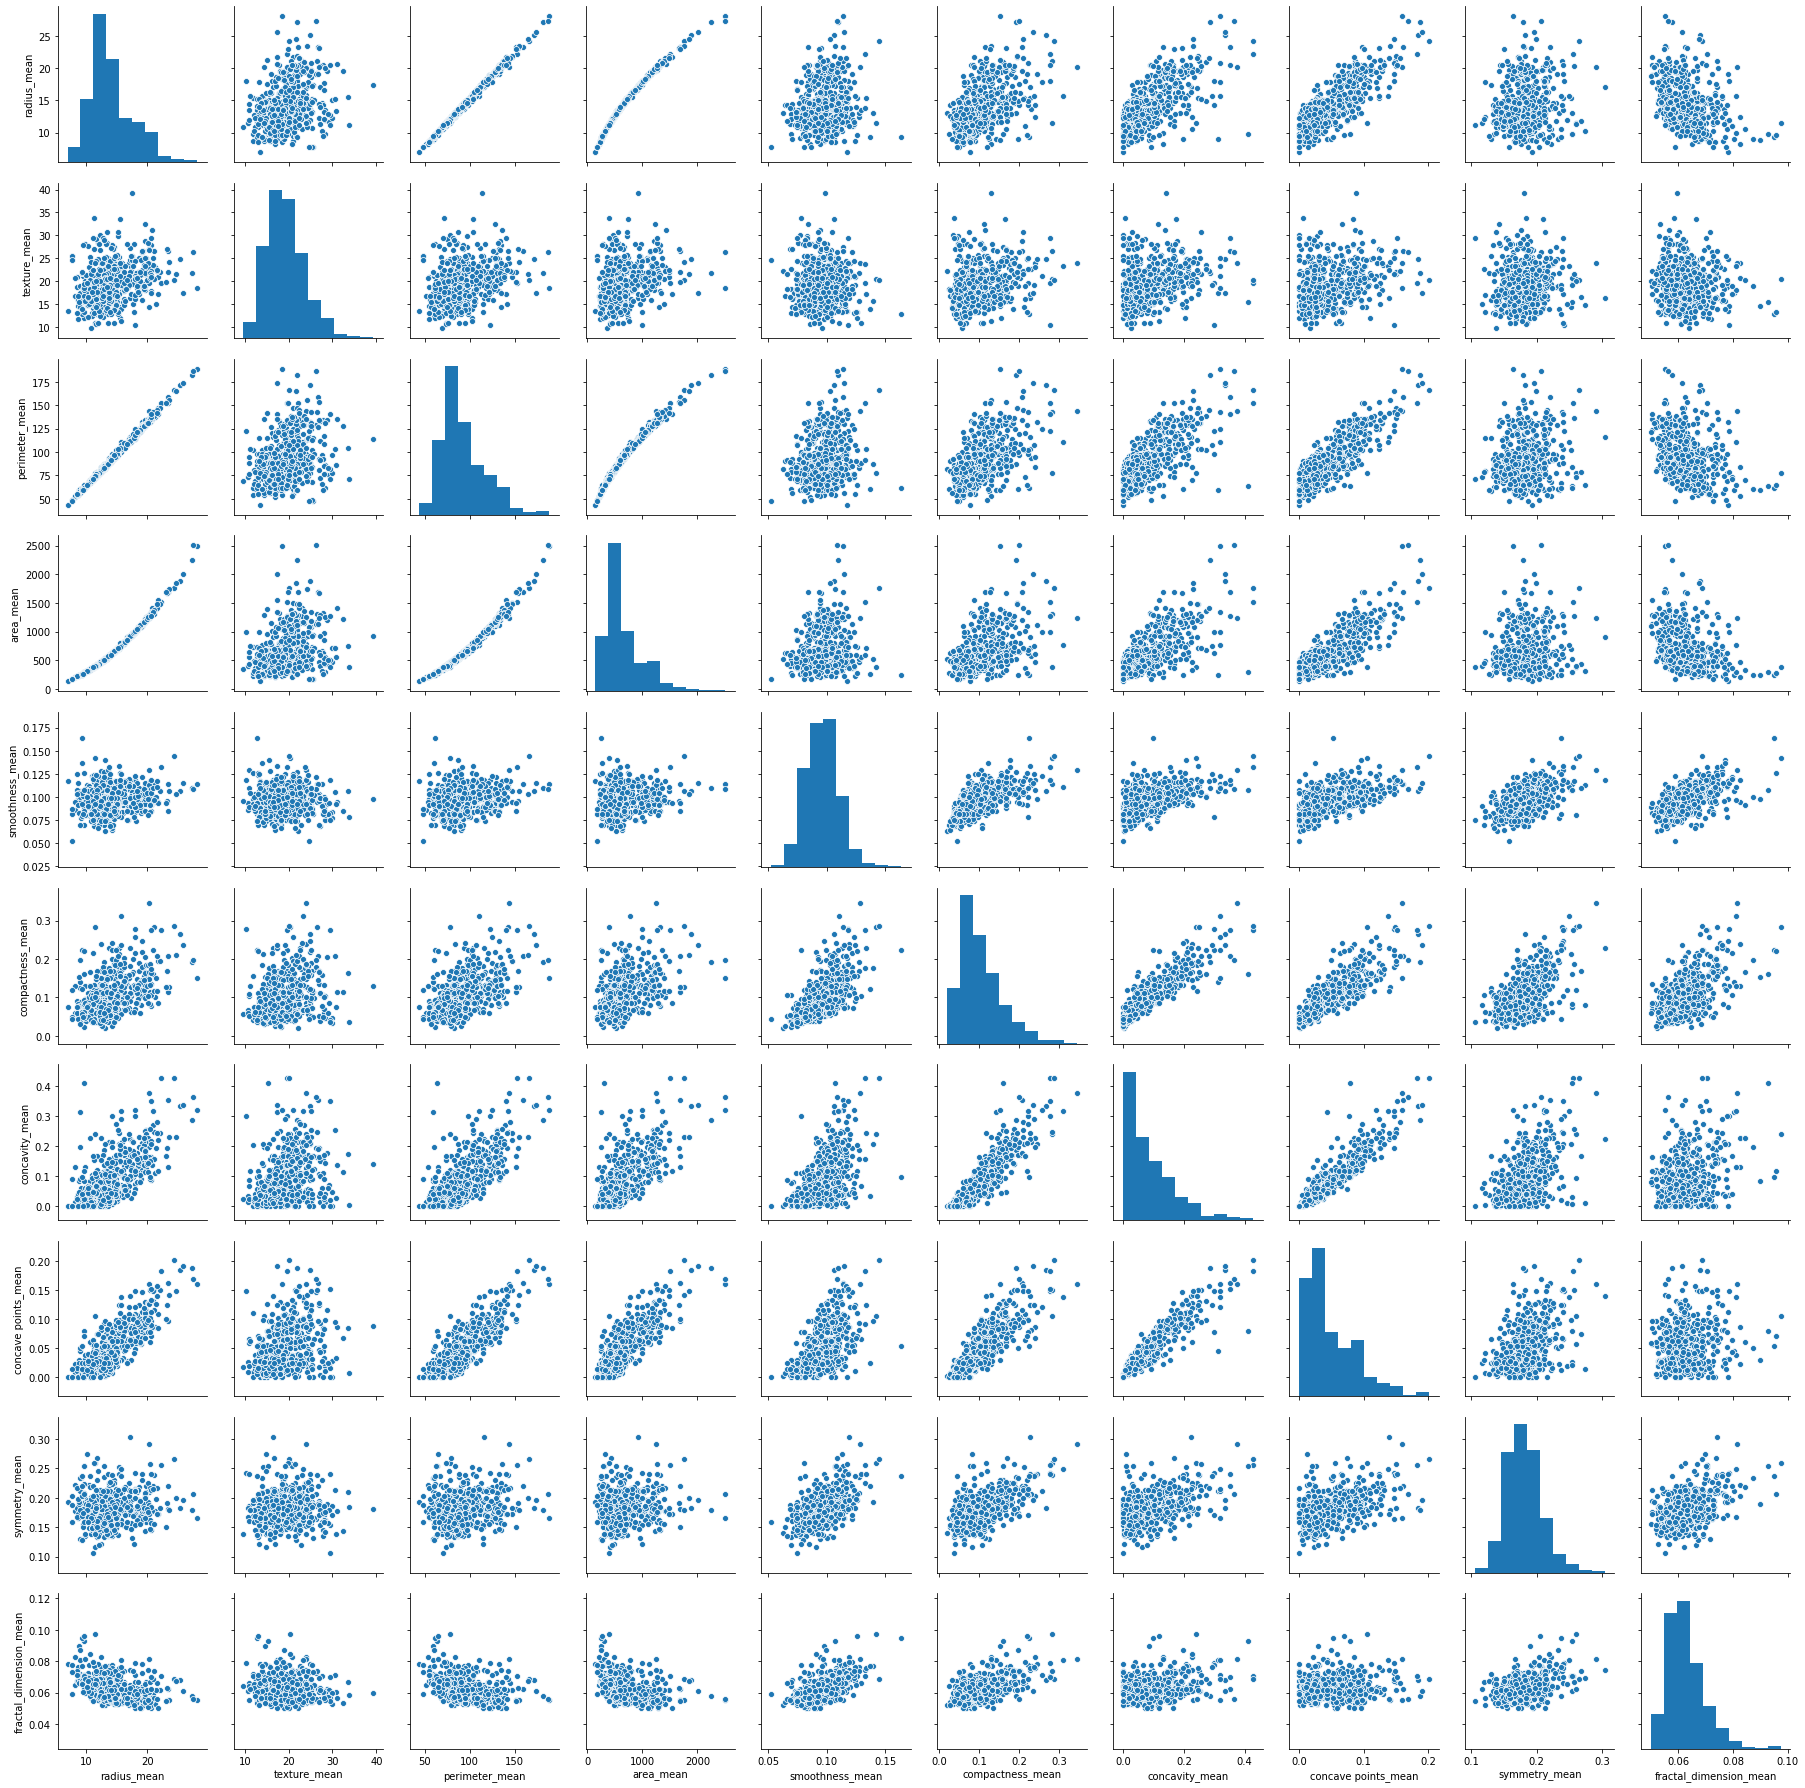

In [0]:
meanCorr = pd.DataFrame(BCW1, columns = ['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean'])
sns.pairplot(meanCorr)
plt.show()

- It looks like the mean and worst values are highly correlation in the 80-90's percentage range; we will only use the mean values.
- Also, there is a high correlation between the 'radius_mean', 'perimeter_mean' and 'area_mean'. Having all three features will cause multicollinearity. Therefore, we will drop 'perimeter_mean' and 'area_mean.'

## Machine Learning: Random Forest

#### Split our data into training and test sets

In [0]:
# Set the mean values as our Predictor Values "x", except for 'perimeter_mean' and 'area_mean.'
# Set diagnosis as our Outcome Value "y".

from sklearn.model_selection import train_test_split
X = BCW1.iloc[:, [1, 2, 5, 6, 7, 8, 9, 10]]
y = BCW1.diagnosis
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

X.head()

,radius_mean,texture_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean
0,17.99,10.38,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871
1,20.57,17.77,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667
2,19.69,21.25,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999
3,11.42,20.38,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744
4,20.29,14.34,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883


#### Fit our data

In [0]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(random_state=42, n_estimators=200, max_depth=10, max_features="log2")
forest.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=10, max_features='log2', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

#### Create a set of predictions and print a report of the results

In [0]:
forestPredictions = forest.predict(X_test)
print(confusion_matrix(y_test, forestPredictions))
print(classification_report(y_test, forestPredictions))

[[104   4]
 [  5  58]]
              precision    recall  f1-score   support

           B       0.95      0.96      0.96       108
           M       0.94      0.92      0.93        63

    accuracy                           0.95       171
   macro avg       0.94      0.94      0.94       171
weighted avg       0.95      0.95      0.95       171



#### Predict single Outcome by inputting Predictor Values
- The diagnosis should be "B"

In [0]:
Xnew = [[7.76, 24.54, 0.05263, 0.04362, 0, 0, 0.1587, 0.05884]] #B
# make a prediction
ynew = forest.predict(Xnew)
print("X=%s, Predicted=%s" % (Xnew[0], ynew[0]))

X=[7.76, 24.54, 0.05263, 0.04362, 0, 0, 0.1587, 0.05884], Predicted=B


#### Predict single Outcome by inputting Predictor Values
- The diagnosis should be "M"

In [0]:
Xnew = [[17.99, 10.38, 0.118, 0.2776, 0.3001, 0.14710, 0.2419, 0.07871]] #M
# make a prediction
ynew = forest.predict(Xnew)
print("X=%s, Predicted=%s" % (Xnew[0], ynew[0]))

X=[17.99, 10.38, 0.118, 0.2776, 0.3001, 0.1471, 0.2419, 0.07871], Predicted=M


## Dianosis Prediction Dashboard

In [0]:
import ipywidgets as widgets
from IPython.display import display

class feature_input():
    def __init__(self, 
                 radius = "", 
                 texture = "", 
                 smoothness = "",
                 compactness = "",
                 concavity = "",
                 concave_points = "",
                 symmetry = "",
                 fractal_dimension = ""
                ):
        self.radius = widgets.Text(description = 'radius',value = radius)
        self.texture = widgets.Text(description = 'texture',value = texture)
        self.smoothness = widgets.Text(description = 'smoothness',value = smoothness)
        self.compactness = widgets.Text(description = 'compactness',value = compactness)
        self.concavity = widgets.Text(description = 'concavity',value = concavity)
        self.concave_points = widgets.Text(description = 'concave_points',value = concave_points)
        self.symmetry = widgets.Text(description = 'symmetry',value = symmetry)
        self.fractal_dimension = widgets.Text(description = 'fractal_dimension',value = fractal_dimension)
        self.radius.on_submit(self.handle_submit)
        self.radius.on_submit(self.handle_submit)
        self.radius.on_submit(self.handle_submit)
        self.radius.on_submit(self.handle_submit)
        self.radius.on_submit(self.handle_submit)
        self.radius.on_submit(self.handle_submit)
        self.radius.on_submit(self.handle_submit)
        self.radius.on_submit(self.handle_submit)
        display(self.radius, self.texture, self.smoothness, self.compactness, self.concavity, self.concave_points, self.symmetry, self.fractal_dimension)

    def handle_submit(self, text):
        self.v = text.value
        return self.v

print("Enter the features below, then press Enter in any field")
f = feature_input()

Enter the features below, then press Enter in any field


Text(value='', description='radius')

Text(value='', description='texture')

Text(value='', description='smoothness')

Text(value='', description='compactness')

Text(value='', description='concavity')

Text(value='', description='concave_points')

Text(value='', description='symmetry')

Text(value='', description='fractal_dimension')

In [0]:
Xnew = [[f.radius.value, f.texture.value, f.smoothness.value, f.compactness.value, f.concavity.value, f.concave_points.value, f.symmetry.value, f.fractal_dimension.value]]
# make a prediction
ynew = forest.predict(Xnew)
print("X=%s, Predicted=%s" % (Xnew[0], ynew[0]))

ValueError: ignored

## K Folds with 10 iterations

- Import Packages for KFold and Cross_Val_Score

In [0]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [0]:
kfold = KFold(10, True, 1)
for train, test in kfold.split(BCW_trans):
    print('train: %s, test: %s' % (train,test))

train: [  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  18  19
  20  21  22  23  24  25  26  27  28  30  31  32  33  34  35  36  37  38
  39  40  42  43  44  45  46  48  50  51  52  53  54  55  56  57  58  59
  60  61  62  63  64  67  68  69  70  71  72  73  74  75  76  77  78  79
  80  81  82  83  84  86  87  88  89  91  92  93  94  95  96  97  98  99
 100 101 102 103 104 105 106 108 109 110 112 113 114 115 116 117 118 119
 120 121 122 123 125 126 127 128 129 130 131 133 134 135 136 137 138 139
 140 141 142 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157
 158 159 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177
 178 179 181 182 183 184 185 188 189 190 191 192 193 194 196 198 199 200
 201 202 203 204 205 206 208 209 210 211 212 213 215 216 217 218 219 220
 222 223 224 225 226 227 228 229 230 231 232 233 234 235 236 238 239 240
 241 243 244 246 247 248 249 250 251 252 253 254 255 256 258 259 260 261
 262 263 264 265 266 267 268 269 270 271 272

- The KFold function will complete 10 iterations of the data using 30% of the data for testing and 70% of the data for training.  

- Import Package to use Logistic Regression Function

In [0]:
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [0]:
logreg = LogisticRegression()
logreg1 = logreg.fit(X_train,y_train)

In [0]:
y_pred=logreg.predict(X_test)

In [0]:
print(cross_val_score(logreg1, X,y, cv=10))

[0.89655172 0.81034483 0.89473684 0.89473684 0.89473684 0.89473684
 0.94736842 0.96428571 0.91071429 0.92857143]


- After KFolds Cross Validation, there were 10 folds generated represented by cv = 10.
- The folds have an accuracy rate from 81% to 96%

## K Means & K Nearest Neighbor

- Import K Nearest Neighbor Packages.

In [0]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [0]:
errorRate = []
for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    predI = knn.predict(X_test)
    errorRate.append(np.mean(predI != y_test))

Text(0, 0.5, 'Error Rate')

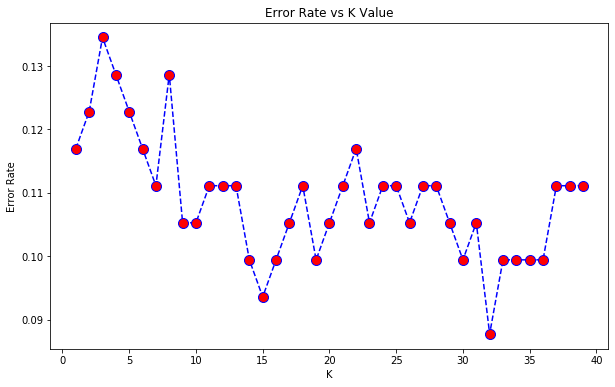

In [0]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40), errorRate, color='blue', linestyle='dashed', marker='o', markerfacecolor='red', markersize=10)
plt.title('Error Rate vs K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

- This graph depicts the Error Rate Vs. the K Value. It shows which values for groups of clusters have the lowest error percentage rate.  
- From the graph, it is observed that the lowest error rate is 32 groups.
- Although this is a large amount of groups, it was decided to use this amount because it provided the lowest error rate which in turn will give the highest accuracy rate.

In [0]:
from sklearn.cluster import KMeans

In [0]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

Text(0, 0.5, 'Texture_Mean')

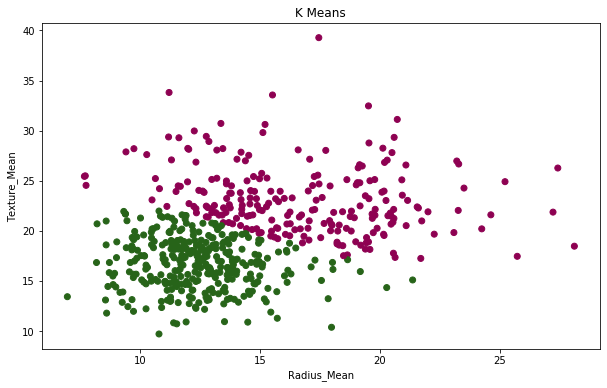

In [0]:
plt.figure(figsize=(10,6))
plt.title('K Means')
plt.scatter(X['radius_mean'], X['texture_mean'], c=kmeans.labels_,cmap='PiYG')
plt.xlabel('Radius_Mean')
plt.ylabel('Texture_Mean')

- K Means graph shows the means of Radius_Mean vs. Texture_Means.
- This particular graph shows two clusters used.

In [0]:
knn = KNeighborsClassifier(n_neighbors=32)
knn.fit(X_train,y_train)
pred = knn.predict(X_test)
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

[[104   4]
 [ 11  52]]
              precision    recall  f1-score   support

           B       0.90      0.96      0.93       108
           M       0.93      0.83      0.87        63

    accuracy                           0.91       171
   macro avg       0.92      0.89      0.90       171
weighted avg       0.91      0.91      0.91       171



- After tweaking the algorithm, the model showed a prediction of Benign correctly 90% of the time and a prediction of malignant correctly 93% of the time.
- This in comparison to the Random Forest algorithm predicts with 5% less accuracy for benign and with 1% less accuracy for malignant.

## Random Forest 2: Using transformed data done in R

## Import Data

In [0]:
url2 = 'https://raw.githubusercontent.com/eno-chen/breastcancerwisconsin/master/BCW_trans.csv'
BCW_trans = pd.read_csv(url2)
BCW_trans.head()

,Unnamed: 0,diagnosis,radius_meanLOG,texture_meanLOG,perimeter_meanLOG,area_meanLOG,smoothness_meanSQRT,compactness_meanLOG,concavity_meanSQRT,concave_points_meanSQRT,symmetry_meanSQRT,fractal_dimension_meanLOG
0,1,M,2.889816,2.339881,4.810557,6.908755,0.344093,-1.281574,0.547814,0.383536,0.491833,-2.541985
1,2,M,3.023834,2.877512,4.889597,7.189922,0.291101,-2.542875,0.294788,0.264896,0.425676,-2.870510
2,3,M,2.980111,3.056357,4.867534,7.092574,0.331059,-1.833207,0.444297,0.357631,0.454863,-2.813577
3,4,M,2.435366,3.014554,4.351310,5.956096,0.377492,-1.259133,0.491325,0.324345,0.509608,-2.328518
4,5,M,3.010128,2.663053,4.906015,7.167809,0.316702,-2.018911,0.444972,0.322955,0.425323,-2.833103


## Data Wrangling

- Dropping the 'Unnamed: 0' as it is the index and cannot be used as a feature.
- Dropping 'diagnosis' from the x-values/predictor values
- Dropping 'perimeter_meanLOG' and 'area_meanLOG' to avoid multicollinearity.
- Dropping 'compactness_meanLOG' and 'concavity_meanSQRT' as they were not selected in the Combined Stepwise - Forward and Backward Selection

In [0]:
X2= BCW_trans.drop(['Unnamed: 0', 'diagnosis','perimeter_meanLOG', 'area_meanLOG', 'compactness_meanLOG', 'concavity_meanSQRT'], axis = 1)
X2.head()

,radius_meanLOG,texture_meanLOG,smoothness_meanSQRT,concave_points_meanSQRT,symmetry_meanSQRT,fractal_dimension_meanLOG
0,2.889816,2.339881,0.344093,0.383536,0.491833,-2.541985
1,3.023834,2.877512,0.291101,0.264896,0.425676,-2.870510
2,2.980111,3.056357,0.331059,0.357631,0.454863,-2.813577
3,2.435366,3.014554,0.377492,0.324345,0.509608,-2.328518
4,3.010128,2.663053,0.316702,0.322955,0.425323,-2.833103


In [0]:
# Setting 'diagnosis' as the y-value
# Setting the rest of the columns as the x-values

from sklearn.model_selection import train_test_split
X = X2
y = BCW_trans.diagnosis
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [0]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(random_state=42, n_estimators=200, max_depth=10, max_features="log2")
forest.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=10, max_features='log2', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [0]:
forestPredictions = forest.predict(X_test)
print(confusion_matrix(y_test, forestPredictions))
print(classification_report(y_test, forestPredictions))

[[102   6]
 [  3  60]]
              precision    recall  f1-score   support

           B       0.97      0.94      0.96       108
           M       0.91      0.95      0.93        63

    accuracy                           0.95       171
   macro avg       0.94      0.95      0.94       171
weighted avg       0.95      0.95      0.95       171



### Conclusion:
- Original Data Random Forest B: 95% M: 94%
- Original Data K Nearest Neighbor B: 90%  M: 93% 
- Transformed Data Random Forest 2 B: 97% M: 91%
        
- The transformed data gives us a higher benign accuracy rate but lower malignant rate.
- However, after consulting with an expert, it was noted that it is more important to have a higher benign accuracy rate than a higher malignant accuracy rate, so that patients are confident that they are cancer-free.
- Therefore the Second Random Forest was selected for the breast cancer predictions based on the aforementioned reasoning.